# Importing Library

In [1]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.manifold import TSNE
from collections import Counter
from sklearn.metrics import accuracy_score , confusion_matrix ,classification_report
from sklearn.preprocessing import StandardScaler
from datetime import datetime
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC ,SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier

# Loading Data

In [2]:
features = list()
with open("UCI_HAR_Dataset/features.txt") as f:
    features = [ line.split("\n")[0] for line in f.readlines()]
print(len(features))
features[0:5]

561


['1 tBodyAcc-mean()-X',
 '2 tBodyAcc-mean()-Y',
 '3 tBodyAcc-mean()-Z',
 '4 tBodyAcc-std()-X',
 '5 tBodyAcc-std()-Y']

In [3]:
len(set(features))

561

In [4]:
Xtrain = pd.read_csv("UCI_HAR_Dataset/train/X_train.txt", delim_whitespace = True , header = None , names= features)
Xtrain["subject"] = pd.read_csv("UCI_HAR_Dataset/train/subject_train.txt" , header = None , squeeze = True)

Ytrain = pd.read_csv("UCI_HAR_Dataset/train/Y_train.txt" ,names = ["Activity"], header = None , squeeze = True)
Ytrain_labels = Ytrain.map({1: 'WALKING', 2:'WALKING_UPSTAIRS',3:'WALKING_DOWNSTAIRS',\
                       4:'SITTING', 5:'STANDING',6:'LAYING'})

Train = Xtrain
Train["Activity"] = Ytrain
Train["Activity_name"] = Ytrain_labels

Train.sample()

,1 tBodyAcc-mean()-X,2 tBodyAcc-mean()-Y,3 tBodyAcc-mean()-Z,4 tBodyAcc-std()-X,5 tBodyAcc-std()-Y,6 tBodyAcc-std()-Z,7 tBodyAcc-mad()-X,8 tBodyAcc-mad()-Y,9 tBodyAcc-mad()-Z,10 tBodyAcc-max()-X,...,"555 angle(tBodyAccMean,gravity)","556 angle(tBodyAccJerkMean),gravityMean)","557 angle(tBodyGyroMean,gravityMean)","558 angle(tBodyGyroJerkMean,gravityMean)","559 angle(X,gravityMean)","560 angle(Y,gravityMean)","561 angle(Z,gravityMean)",subject,Activity,Activity_name
3109,0.275417,-0.015811,-0.104005,-0.996135,-0.986148,-0.984345,-0.996561,-0.98768,-0.98366,-0.940731,...,0.052338,0.035564,-0.146804,0.223848,-0.675355,0.196191,-0.191574,16,4,SITTING


In [5]:
Train.shape

(7352, 564)

In [6]:
Xtest = pd.read_csv("UCI_HAR_Dataset/test/X_test.txt", delim_whitespace = True , header = None , names= features)
Xtest["subject"] = pd.read_csv("UCI_HAR_Dataset/test/subject_test.txt" , header = None , squeeze = True)

Ytest = pd.read_csv("UCI_HAR_Dataset/test/Y_test.txt" ,names = ["Activity"], header = None , squeeze = True)
Ytest_labels = Ytest.map({1: 'WALKING', 2:'WALKING_UPSTAIRS',3:'WALKING_DOWNSTAIRS',\
                       4:'SITTING', 5:'STANDING',6:'LAYING'})

Test = Xtest
Test["Activity"] = Ytest
Test["Activity_name"] = Ytest_labels

Test.sample()

,1 tBodyAcc-mean()-X,2 tBodyAcc-mean()-Y,3 tBodyAcc-mean()-Z,4 tBodyAcc-std()-X,5 tBodyAcc-std()-Y,6 tBodyAcc-std()-Z,7 tBodyAcc-mad()-X,8 tBodyAcc-mad()-Y,9 tBodyAcc-mad()-Z,10 tBodyAcc-max()-X,...,"555 angle(tBodyAccMean,gravity)","556 angle(tBodyAccJerkMean),gravityMean)","557 angle(tBodyGyroMean,gravityMean)","558 angle(tBodyGyroJerkMean,gravityMean)","559 angle(X,gravityMean)","560 angle(Y,gravityMean)","561 angle(Z,gravityMean)",subject,Activity,Activity_name
112,0.153661,-0.010078,-0.043895,-0.214278,0.132208,-0.199881,-0.357468,0.025411,-0.259067,0.318677,...,0.554922,-0.335483,0.98929,-0.168345,-0.676271,0.32173,0.012499,2,3,WALKING_DOWNSTAIRS


In [7]:
Test.shape

(2947, 564)

# Data Preprocessing

In [8]:
print("No. of duplicated values in Train :",sum(Train.duplicated()))
print("No. of duplicated values in Test :",sum(Test.duplicated()))

No. of duplicated values in Train : 0
No. of duplicated values in Test : 0


In [9]:
print("Np. of Nan or null values in Train :" , Train.isnull().values.sum())
print("No. of Nan or null values in Test :", Test.isnull().values.sum())

Np. of Nan or null values in Train : 0
No. of Nan or null values in Test : 0


# Checking data imbalanced

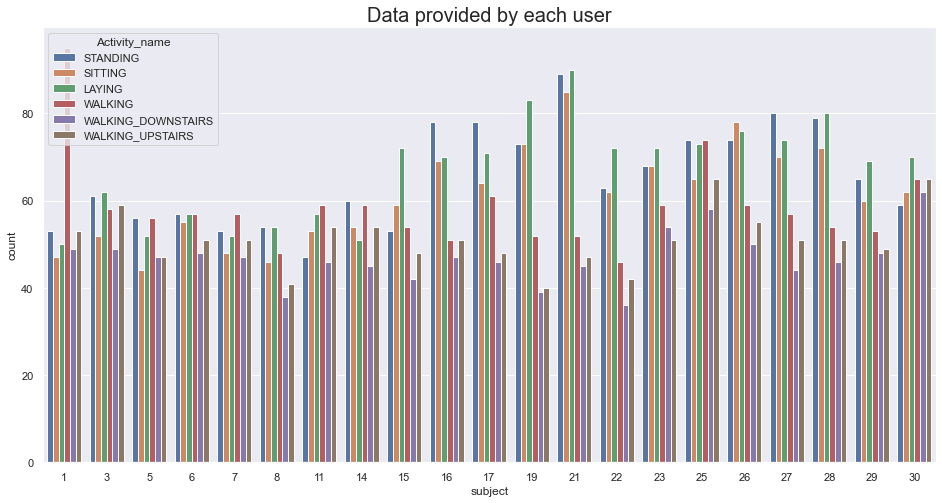

In [10]:
sns.set_theme(style = "darkgrid")
plt.figure(figsize = (16,8))
plt.title("Data provided by each user",fontsize = 20)
sns.countplot(x = "subject",hue = "Activity_name",data = Train)
plt.show()

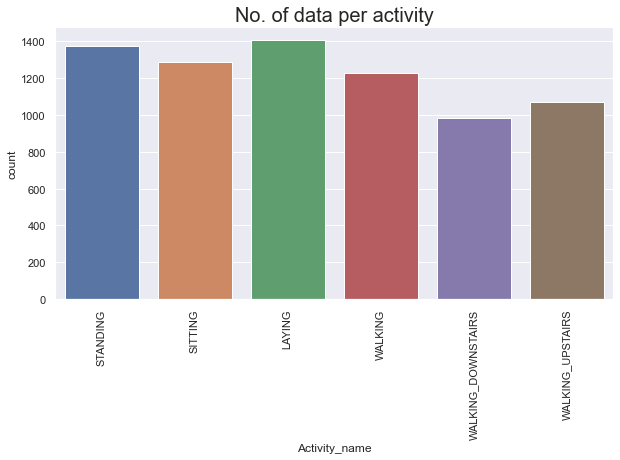

In [11]:
plt.figure(figsize = (10,5))
plt.title("No. of data per activity",fontsize = 20)
sns.countplot(x = Train.Activity_name)
plt.xticks(rotation = 90)
plt.show()

# Changing columns name

In [12]:
columns = Train.columns

# Removing '()' from column names
columns = columns.str.replace('[()]','')
columns = columns.str.replace('[-]', '')
columns = columns.str.replace('[,]','')

Train.columns = columns
Test.columns = columns

Test.columns

Index(['1 tBodyAccmeanX', '2 tBodyAccmeanY', '3 tBodyAccmeanZ',
       '4 tBodyAccstdX', '5 tBodyAccstdY', '6 tBodyAccstdZ', '7 tBodyAccmadX',
       '8 tBodyAccmadY', '9 tBodyAccmadZ', '10 tBodyAccmaxX',
       ...
       '555 angletBodyAccMeangravity', '556 angletBodyAccJerkMeangravityMean',
       '557 angletBodyGyroMeangravityMean',
       '558 angletBodyGyroJerkMeangravityMean', '559 angleXgravityMean',
       '560 angleYgravityMean', '561 angleZgravityMean', 'subject', 'Activity',
       'Activity_name'],
      dtype='object', length=564)

In [13]:
for i in columns:
    if i.find("tBodyAccMagmean")>= 0 :
        print(i)

201 tBodyAccMagmean


# EDA

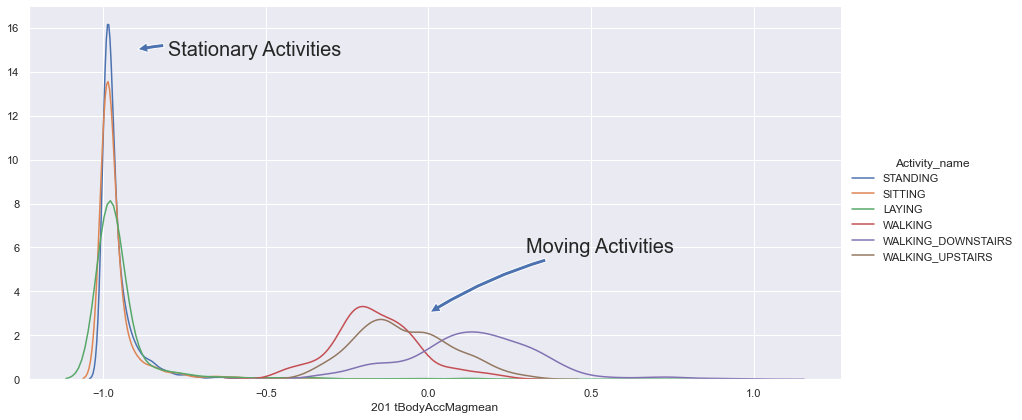

In [14]:
sns.FacetGrid(Train,hue = "Activity_name",height = 6 , aspect = 2)\
.map(sns.distplot,'201 tBodyAccMagmean',hist = False)\
.add_legend()

plt.annotate("Stationary Activities",xy = (-0.9,15),\
             xytext = (-0.8,15),va = "center",ha = "left",size = 20,\
             arrowprops = dict(arrowstyle = "simple",connectionstyle = "arc3,rad= 0.1"))

plt.annotate("Moving Activities",xy = (0,3),xytext = (0.3,6),\
            va="center",ha = "left",size = 20, arrowprops = dict(arrowstyle= "simple",connectionstyle = "arc3,rad = 0.1"))
plt.show()

# TSNE

In [9]:
x_tsne = Train.drop(["subject","Activity","Activity_name"],axis = 1)
y_tsne = Train.Activity_name

print(x_tsne.shape , y_tsne.shape)

(7352, 561) (7352,)


Performing TSNE with perplexity 20
Plotting visualisation of TSNE


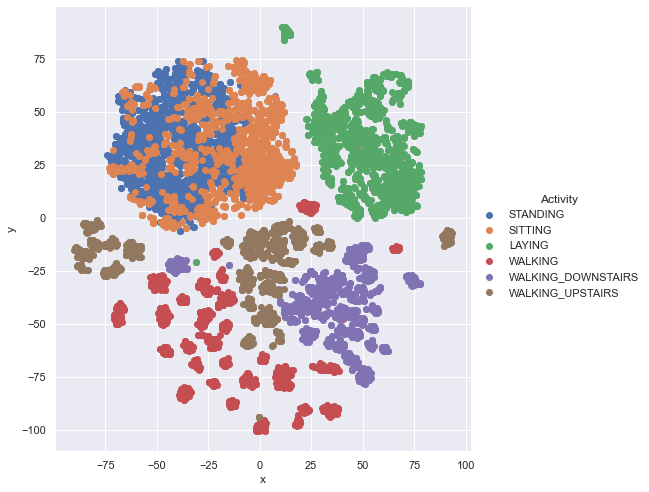

Performing TSNE with perplexity 30
Plotting visualisation of TSNE


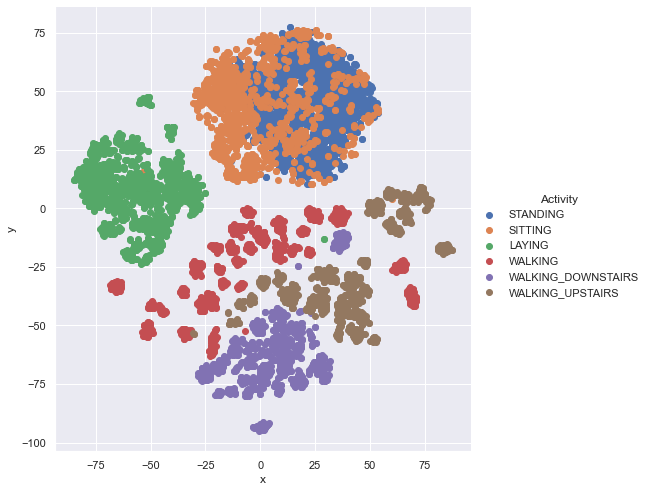

Performing TSNE with perplexity 40
Plotting visualisation of TSNE


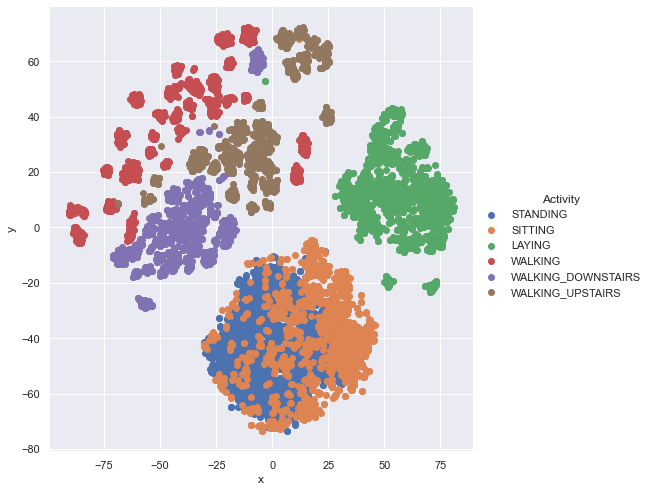

Performing TSNE with perplexity 50
Plotting visualisation of TSNE


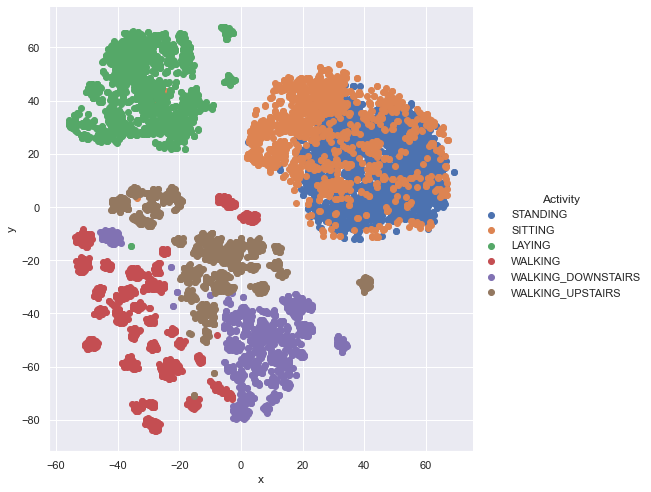

In [22]:

def perform_tsne(xdata , ydata , perplexity , n_iter = 2000):
    for i in perplexity:
        print("Performing TSNE with perplexity",i)
        tsne = TSNE(perplexity = i).fit_transform(xdata)
        
        print("Plotting visualisation of TSNE")
        dataset = pd.DataFrame(tsne,columns = ["x","y"])
        dataset["Activity"] = ydata
        sns.FacetGrid(dataset,hue = "Activity",height = 7).map(plt.scatter,"x","y").add_legend()
        plt.savefig("TSNE with perplexity" + str(i))
        plt.show()
 
perform_tsne(x_tsne,y_tsne,[20,30,40,50],3000)

# ML Model

In [16]:
Xtrain = Train.drop(["subject","Activity","Activity_name"],axis = 1)
Ytrain = Train.Activity

Xtest = Test.drop(["subject","Activity","Activity_name"] , axis = 1)
Ytest = Test.Activity

Activity_labels = Ytrain_labels

Scaler = StandardScaler()

Xtrain = Scaler.fit_transform(Xtrain)
Xtest = Scaler.fit_transform(Xtest)

print(Xtrain.shape , Ytrain.shape)
print(Xtest.shape , Ytest.shape)

(7352, 561) (7352,)
(2947, 561) (2947,)


In [17]:
def model_run(model,xtrain,ytrain,xtest,ytest):
    model = model.fit(xtrain,ytrain)
    ypred = model.predict(xtest)
    print("\n\n\n")
    print("Best Estimator\n")
    print(model.best_estimator_)
    print("\n\n\n")
    print("Best Parameter\n")
    print(model.best_params_)
    print("\n\n\n")
    print("Best Score\n")
    print(model.best_score_)
    print("\n\n\n")
    print("Accuracy score",accuracy_score(ytest, ypred))
    print("\n\n\n")
    print("Confusion matrix\n", confusion_matrix(ytest,ypred))
    print("\n\n\n")
    print("Classfication report\n")
    print(classification_report(ytest,ypred))
    print("\n\n\n")
    
 

# Logistic Regression

In [ ]:
model = LogisticRegression(max_iter = 1000)
params = {"C" : [0.01,0.1,1,10,20,30],"penalty" : ["l1","l2"]}

grid_search = GridSearchCV(model,param_grid = params , cv =3,verbose = 1 , n_jobs = - 1)

model_run(grid_search,Xtrain,Ytrain,Xtest,Ytest)

# Linear SVM Classifier

In [14]:
model = LinearSVC(max_iter = 2000,tol= 0.00005)
params = {"C": [0.01,0.1,1,10,20,30],"penalty":["l1","l2"]}

grid_search = GridSearchCV(model,param_grid = params ,cv =3 ,verbose = 1 , n_jobs = -1)

model_run(grid_search , Xtrain ,Ytrain, Xtest , Ytest)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:   39.9s finished






Best Estimator

LinearSVC(C=0.1, max_iter=2000, tol=5e-05)




Best Parameter

{'C': 0.1, 'penalty': 'l2'}




Best Score

0.9382506099134881




Accuracy score 0.9636918900576857




Confusion matrix
 [[479  11   4   2   0   0]
 [  4 465   1   1   0   0]
 [  1   2 416   1   0   0]
 [  0   4   0 433  52   2]
 [  0   0   0  16 516   0]
 [  0   0   0   0   6 531]]




Classfication report

              precision    recall  f1-score   support

           1       0.99      0.97      0.98       496
           2       0.96      0.99      0.98       471
           3       0.99      0.99      0.99       420
           4       0.96      0.88      0.92       491
           5       0.90      0.97      0.93       532
           6       1.00      0.99      0.99       537

    accuracy                           0.96      2947
   macro avg       0.97      0.96      0.96      2947
weighted avg       0.96      0.96      0.96      2947







# Kernel SVM Classifier

In [24]:
model = SVC(kernel = "rbf")
params = { "C": [0.1,1,2,4] , "gamma" :[0.0078,0.01,1,1.125,2]}

grid_search = GridSearchCV(model, param_grid = params , cv= 3 , verbose = 1 , n_jobs = -1)
model_run(grid_search , Xtrain , Ytrain , Xtest , Ytest)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:  6.2min
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed: 12.4min finished






Best Estimator

SVC(C=2, gamma=0.0078)




Best Parameter

{'C': 2, 'gamma': 0.0078}




Best Score

0.8707873226810103




Accuracy score 0.9087207329487614




Confusion matrix
 [[415   0  81   0   0   0]
 [  5 413  53   0   0   0]
 [  4  24 392   0   0   0]
 [  0   0  19 439  32   1]
 [  0   0  10  24 498   0]
 [  0   0  16   0   0 521]]




Classfication report

              precision    recall  f1-score   support

           1       0.98      0.84      0.90       496
           2       0.95      0.88      0.91       471
           3       0.69      0.93      0.79       420
           4       0.95      0.89      0.92       491
           5       0.94      0.94      0.94       532
           6       1.00      0.97      0.98       537

    accuracy                           0.91      2947
   macro avg       0.92      0.91      0.91      2947
weighted avg       0.92      0.91      0.91      2947







In [29]:
#May improve more

model = SVC(kernel = "rbf")
params = { "C": [1.8,2,2.2] , "gamma" :[0.001,0.003,0.006]}

grid_search = GridSearchCV(model, param_grid = params , cv= 3 , verbose = 1 , n_jobs = -1)
model_run(grid_search , Xtrain , Ytrain , Xtest , Ytest)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  27 out of  27 | elapsed:  1.7min finished






Best Estimator

SVC(C=2.2, gamma=0.001)




Best Parameter

{'C': 2.2, 'gamma': 0.001}




Best Score

0.9321291045998162




Accuracy score 0.9565659993213438




Confusion matrix
 [[481   9   6   0   0   0]
 [  7 462   2   0   0   0]
 [  4  23 393   0   0   0]
 [  0   1   0 446  42   2]
 [  0   0   0  32 500   0]
 [  0   0   0   0   0 537]]




Classfication report

              precision    recall  f1-score   support

           1       0.98      0.97      0.97       496
           2       0.93      0.98      0.96       471
           3       0.98      0.94      0.96       420
           4       0.93      0.91      0.92       491
           5       0.92      0.94      0.93       532
           6       1.00      1.00      1.00       537

    accuracy                           0.96      2947
   macro avg       0.96      0.96      0.96      2947
weighted avg       0.96      0.96      0.96      2947







# Decision Tree Classifier

In [27]:
model = DecisionTreeClassifier()
params = {"max_depth" : np.arange(3,8)}

grid_search = GridSearchCV(model,param_grid = params, n_jobs = -1)
model_run(grid_search , Xtrain , Ytrain , Xtest , Ytest)





Best Estimator

DecisionTreeClassifier(max_depth=7)




Best Parameter

{'max_depth': 7}




Best Score

0.8512037255418823




Accuracy score 0.8788598574821853




Confusion matrix
 [[446  14  36   0   0   0]
 [ 57 372  42   0   0   0]
 [  6  50 364   0   0   0]
 [  0   0   0 445  46   0]
 [  0   0   0 106 426   0]
 [  0   0   0   0   0 537]]




Classfication report

              precision    recall  f1-score   support

           1       0.88      0.90      0.89       496
           2       0.85      0.79      0.82       471
           3       0.82      0.87      0.84       420
           4       0.81      0.91      0.85       491
           5       0.90      0.80      0.85       532
           6       1.00      1.00      1.00       537

    accuracy                           0.88      2947
   macro avg       0.88      0.88      0.88      2947
weighted avg       0.88      0.88      0.88      2947







# Random Forest Classifier

In [30]:
model = RandomForestClassifier(n_jobs = -1)
params = {"n_estimators" : np.arange(100,300,20)  , "max_depth" : np.arange(3,15,2) }

grid_search = GridSearchCV(model,param_grid = params)
model_run(grid_search , Xtrain , Ytrain , Xtest , Ytest)





Best Estimator

RandomForestClassifier(max_depth=13, n_estimators=140)




Best Parameter

{'max_depth': 13, 'n_estimators': 140}




Best Score

0.9211135929558771




Accuracy score 0.9172039362063115




Confusion matrix
 [[464   8  24   0   0   0]
 [ 15 448   8   0   0   0]
 [  8  36 376   0   0   0]
 [  0   0   0 456  35   0]
 [  0   0   0 110 422   0]
 [  0   0   0   0   0 537]]




Classfication report

              precision    recall  f1-score   support

           1       0.95      0.94      0.94       496
           2       0.91      0.95      0.93       471
           3       0.92      0.90      0.91       420
           4       0.81      0.93      0.86       491
           5       0.92      0.79      0.85       532
           6       1.00      1.00      1.00       537

    accuracy                           0.92      2947
   macro avg       0.92      0.92      0.92      2947
weighted avg       0.92      0.92      0.92      2947







# Gradient Boosting Classifier

In [ ]:
model = GradientBoostingClassifier()
params = {"n_estimators" : np.arange(130,170,10)  , "max_depth" : np.arange(5,8,1) }

grid_search = GridSearchCV(model,param_grid = params,n_jobs = -1)
model_run(grid_search , Xtrain , Ytrain , Xtest , Ytest)

# Conclusion

Logistic Regression , Linear SVC and Kernel SVC will be most accurate